In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import ensemble
import time

In [7]:
images_train.shape, images_test.shape, cls_train.shape, cls_test.shape, labels_train.shape, labels_test.shape

((50000, 32, 32, 3),
 (10000, 32, 32, 3),
 (50000,),
 (10000,),
 (50000, 10),
 (10000, 10))

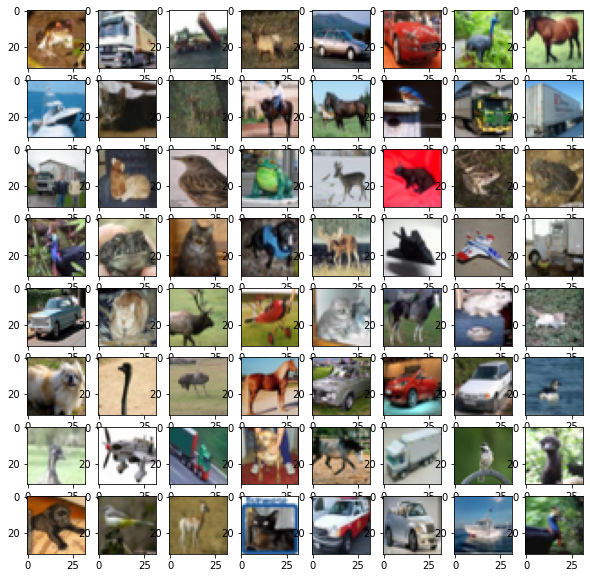

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

In [9]:
pca = PCA()
pca.fit(labels_train)

PCA()

In [14]:
k=0;
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.99:
    currentSum+=pca.explained_variance_[k]
    k+=1
k

9

In [15]:
pca = PCA(n_components=k)
labels_transformed = pca.fit_transform(labels_train)
labels_transformed.shape

(50000, 9)

In [16]:
X_train = labels_transformed
X_test = pca.transform(labels_test)
Y_train = [class_names[i] for i in cls_train]
Y_test = [class_names[i] for i in cls_test]

In [17]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(labels_train,cls_train)
print(time.time()-start)
cls_pred = rf.predict(labels_test)

2.545933246612549


In [18]:
print(classification_report(cls_test , cls_pred))
print(confusion_matrix(cls_test , cls_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0 1000   

In [19]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(X_train,Y_train)
print(time.time()-start)
y_pred = rf.predict(X_test)

1.6477749347686768


In [20]:
print(classification_report(Y_test , y_pred))
print(confusion_matrix(Y_test , y_pred))

              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00      1000
  automobile       1.00      1.00      1.00      1000
        bird       1.00      1.00      1.00      1000
         cat       1.00      1.00      1.00      1000
        deer       1.00      1.00      1.00      1000
         dog       1.00      1.00      1.00      1000
        frog       1.00      1.00      1.00      1000
       horse       1.00      1.00      1.00      1000
        ship       1.00      1.00      1.00      1000
       truck       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0 1000   

In [22]:
import pandas as pd
df = pd.DataFrame(y_pred,columns=['hh'])
df.head()

,hh
0,cat
1,ship
2,ship
3,airplane
4,frog


In [24]:
df['hh'].to_csv("hh", index = False , header=False)